In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
df=pd.read_csv('finalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
#Drop ID, DeliveryPerson_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date
#Those are non factors for training our model
df.drop(columns=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date'],inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
#Ckeck for missing values

check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Delivery_person_Ratings    4.185679
Delivery_person_Age        4.067217
Time_Orderd                3.797385
City                       2.632503
multiple_deliveries        2.178396
Weather_conditions         1.351351
Road_traffic_density       1.318445
Festival                   0.500176
dtype: float64

In [5]:
#Checking for no of unique values on object datatype
df.select_dtypes(include='object').nunique()

Time_Orderd             176
Time_Order_picked       193
Weather_conditions        6
Road_traffic_density      4
Type_of_order             4
Type_of_vehicle           4
Festival                  2
City                      3
dtype: int64

In [6]:
#Statistical representation of the dataset
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,1.023385,0.744635,26.293963
std,5.815064,0.334744,0.839055,0.572510,9.384298
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [7]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Categorise the Objective variables

In [8]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

In [9]:
# Dropping Nul Values from the dataset
df.dropna(axis=0,how='any',inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


<Axes: xlabel='City'>

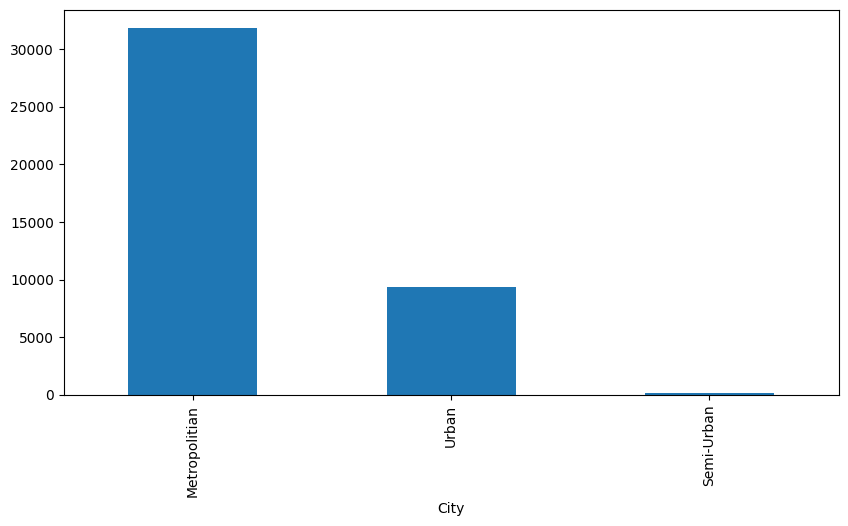

In [10]:
#The Cities order more
plt.figure(figsize=(10,5))
df['City'].value_counts().plot(kind='bar')

<Axes: xlabel='Type_of_order'>

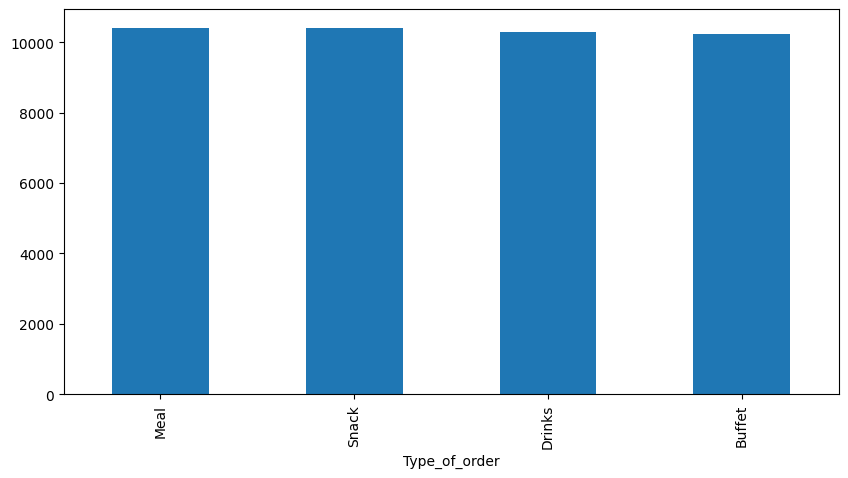

In [11]:
#The items order are all sorts and almost equal proportions 
plt.figure(figsize=(10,5))
df['Type_of_order'].value_counts().plot(kind='bar')

<Axes: xlabel='Weather_conditions'>

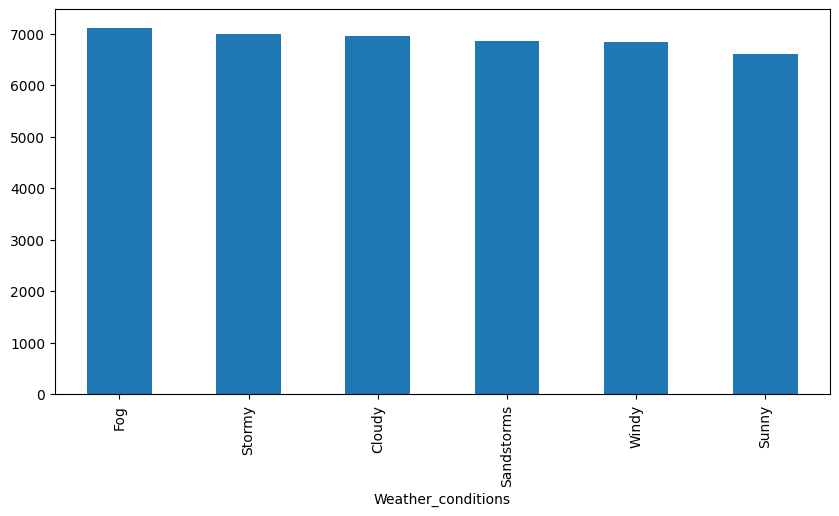

In [12]:
#The orders are similar in count in all sorts of weathers except little low on a sunny day
plt.figure(figsize=(10,5))
df['Weather_conditions'].value_counts().plot(kind='bar')

<Axes: xlabel='Festival'>

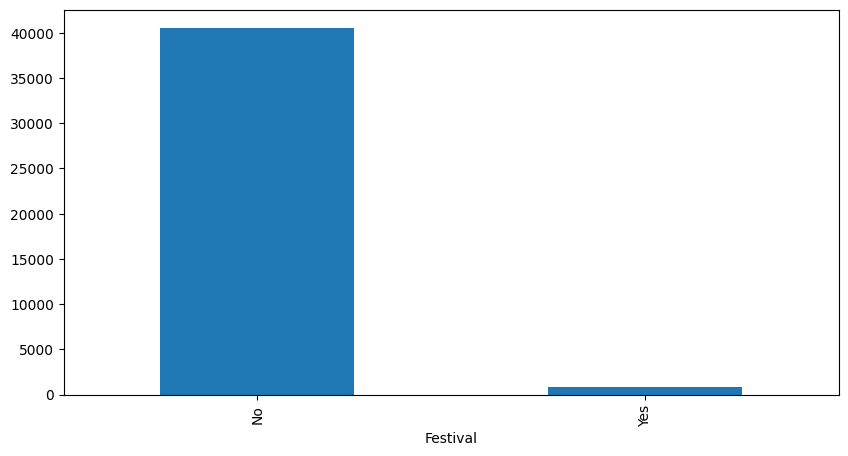

In [13]:
#The Orders are more on non festival days right !
plt.figure(figsize=(10,5))
df['Festival'].value_counts().plot(kind='bar')

In [14]:
#Check for unique values on object datatype
df.select_dtypes(include='object').nunique()

Time_Orderd             176
Time_Order_picked       193
Weather_conditions        6
Road_traffic_density      4
Type_of_order             4
Type_of_vehicle           3
Festival                  2
City                      3
dtype: int64

EXPLORATORY DATA ANALYSIS

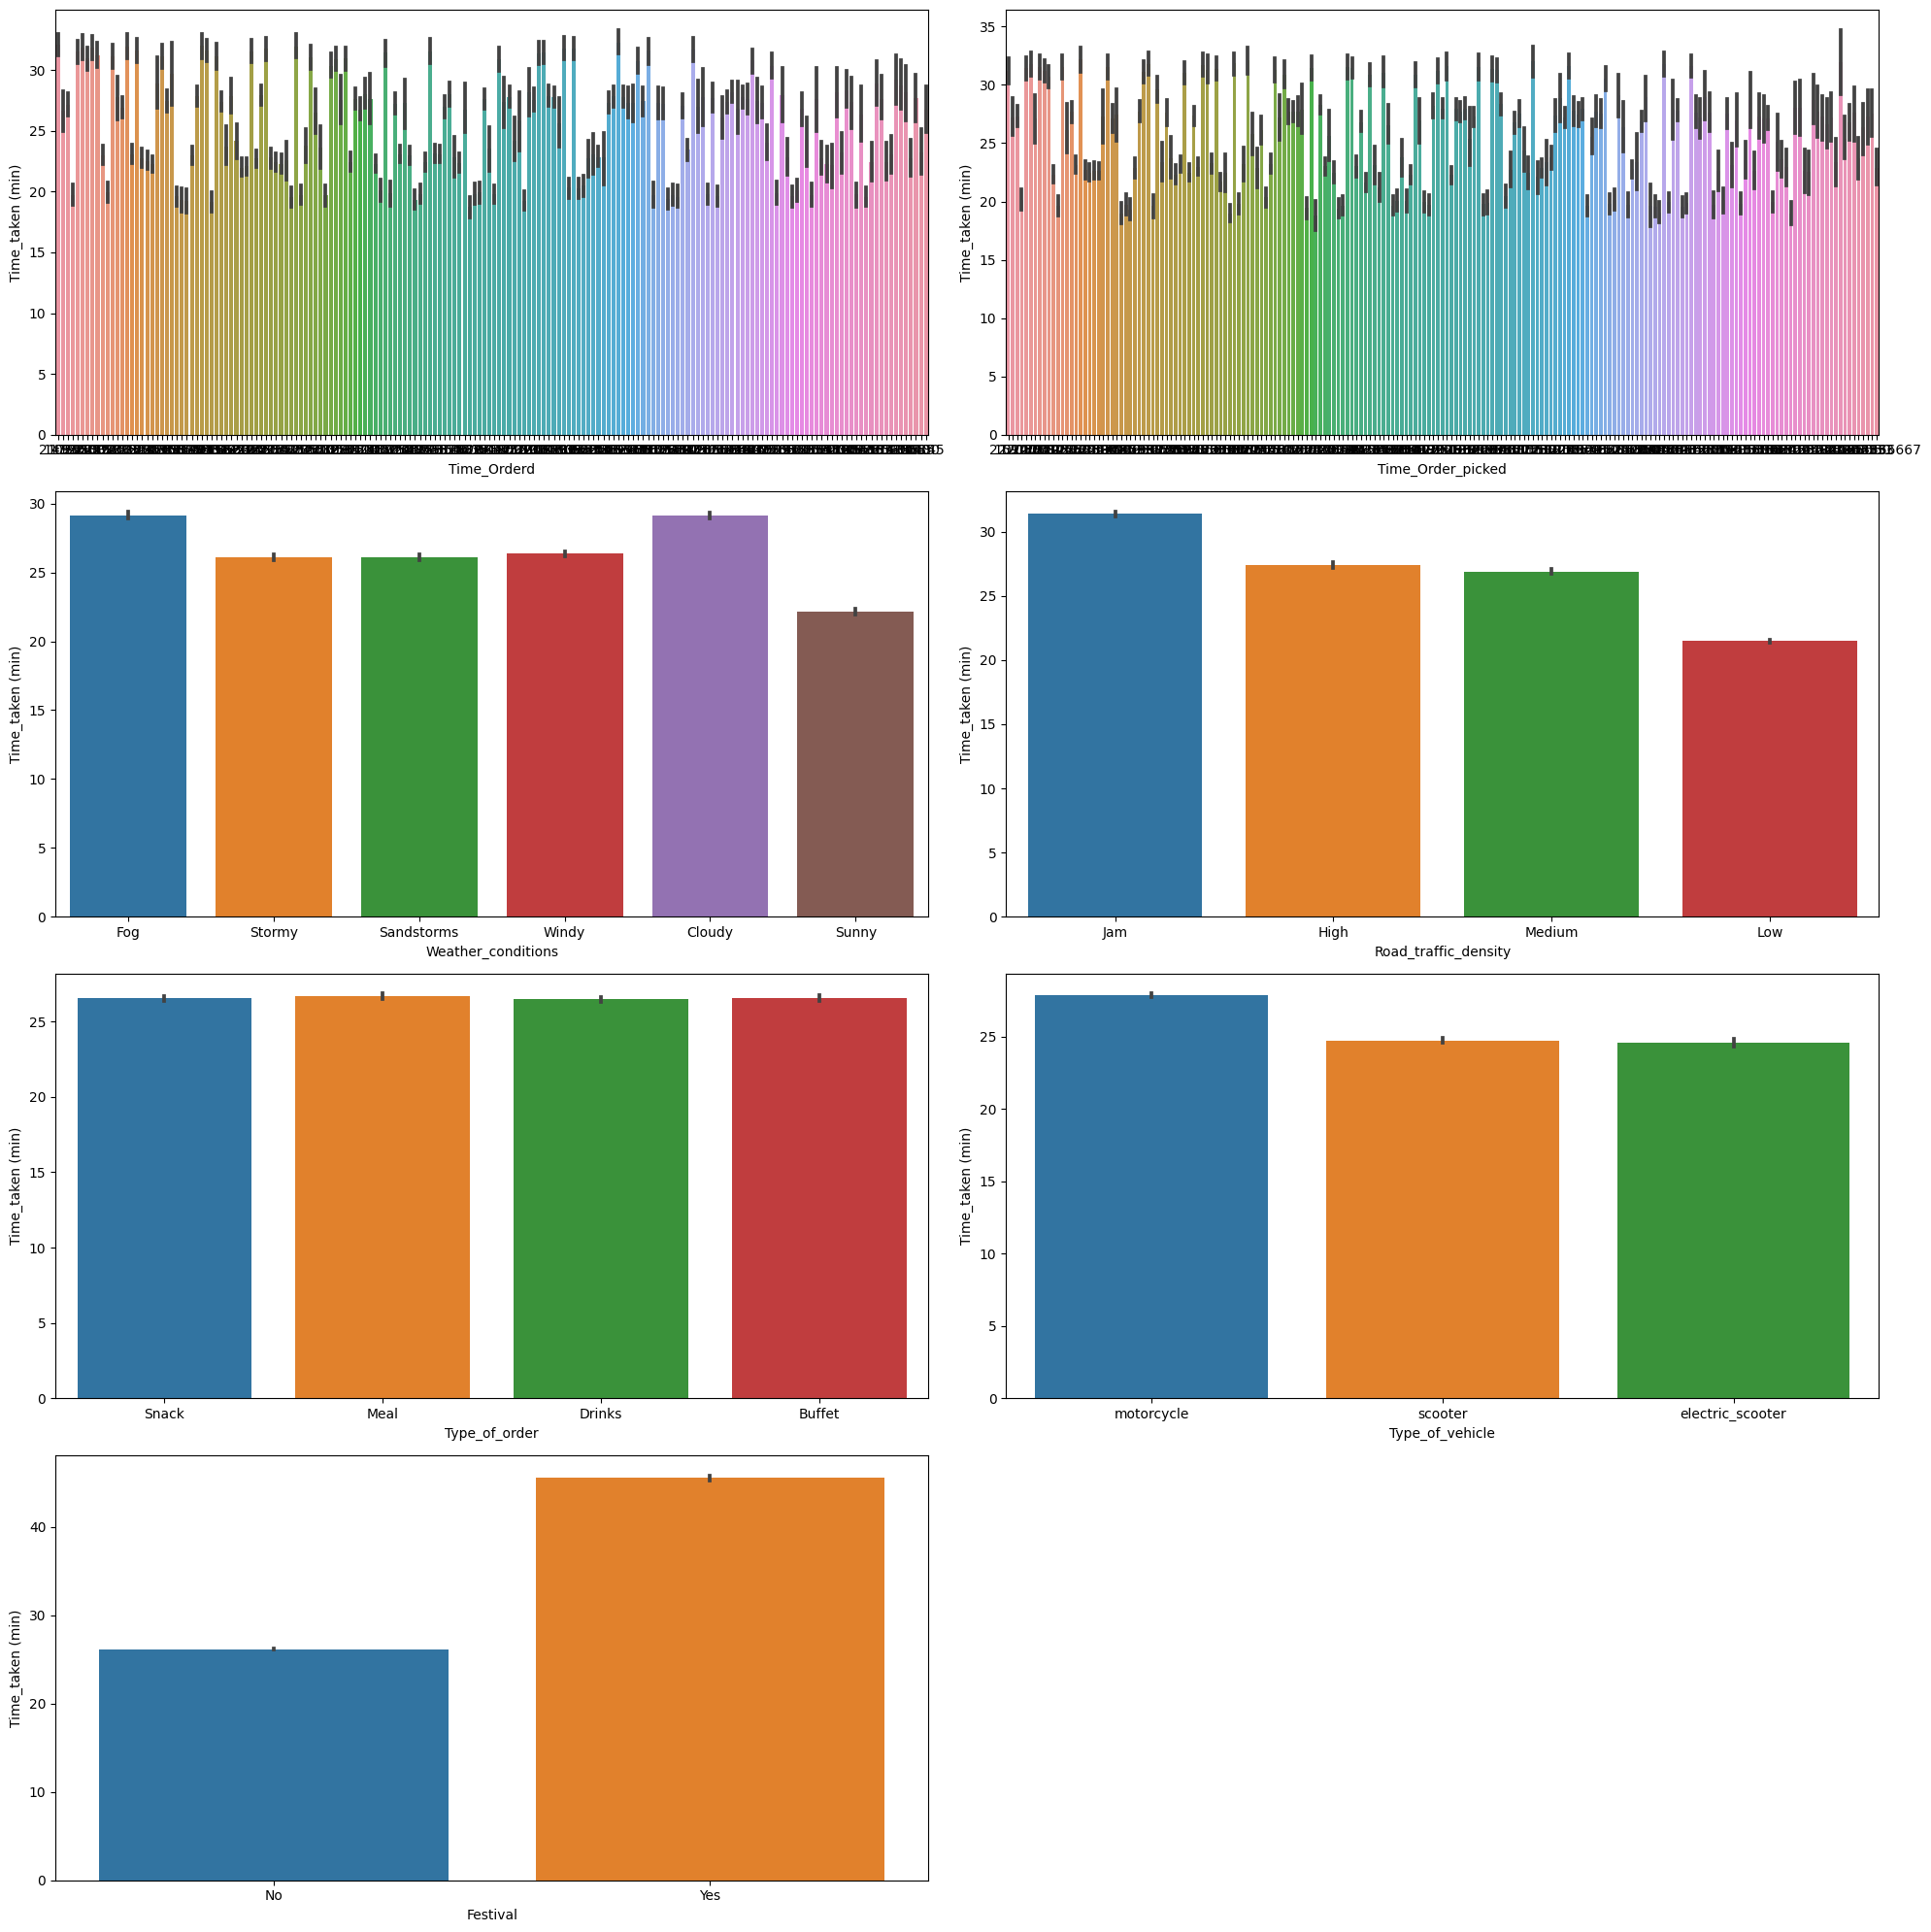

In [15]:
#lIST OF CATEGORIAL VARIABLES TO PLOT

cat_vars=['Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']

# Create figure with subplots

fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
axs=axs.flatten()

#create barplot for each catagorial variable

for i, var in enumerate(cat_vars):
    sns.barplot(x=var,y='Time_taken (min)',data=df,ax=axs[i],estimator=np.mean)
axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
fig.delaxes(axs[7])    
fig.tight_layout()
plt.show()

Graphichal representation of the time ordered to take delivered on hue type of order

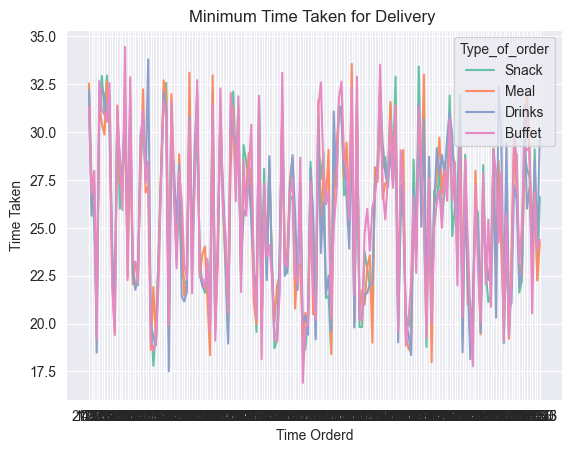

In [16]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='Time_Orderd',y='Time_taken (min)',hue='Type_of_order',data=df,errorbar=None)

plt.title('Minimum Time Taken for Delivery ')
plt.xlabel('Time Orderd')
plt.ylabel('Time Taken')

plt.show()

LABEL ENCODING FOR OBJECT DATA TYPE


In [17]:
# Loop over each coulmn in the DataFrame where the data type is object

for col in df.select_dtypes(include=['object']).columns:
    
    #Print the column name and unique value
    print(f"{col}: {df[col].unique()}")

Time_Orderd: ['21:55' '14:55' '17:30' '09:20' '19:50' '20:25' '20:30' '21:15' '20:20'
 '22:30' '08:15' '19:30' '12:25' '18:35' '20:35' '23:20' '21:20' '23:35'
 '22:35' '23:25' '13:35' '21:35' '18:55' '14:15' '0.458333333' '09:45'
 '08:40' '0.958333333' '17:25' '19:45' '19:10' '10:55' '21:40'
 '0.791666667' '16:45' '11:30' '15:10' '22:45' '22:10' '20:45' '22:50'
 '17:55' '20:15' '22:25' '22:40' '23:50' '15:25' '10:20' '20:55' '10:40'
 '15:55' '20:10' '12:10' '15:30' '10:35' '21:10' '20:50' '12:35' '0.875'
 '23:40' '18:15' '18:20' '11:45' '12:45' '23:30' '10:50' '21:25' '10:10'
 '17:50' '22:20' '12:40' '23:55' '10:25' '08:45' '23:45' '19:55' '22:15'
 '23:10' '18:25' '18:45' '16:50' '1' '14:20' '10:15' '08:50' '0.375'
 '17:45' '16:35' '08:30' '21:45' '14:50' '18:10' '12:20' '12:50' '09:10'
 '12:30' '17:10' '19:15' '20:40' '17:20' '18:30' '13:10' '19:35' '09:50'
 '0.833333333' '10:30' '09:40' '15:35' '16:55' '22:55' '0.666666667'
 '0.75' '17:15' '21:30' '18:40' '11:10' '13:50' '21:50' '11:

In [18]:
df.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                 object
Time_Order_picked           object
Weather_conditions          object
Road_traffic_density        object
Vehicle_condition            int64
Type_of_order               object
Type_of_vehicle             object
multiple_deliveries        float64
Festival                    object
City                        object
Time_taken (min)             int64
dtype: object

In [19]:
from sklearn import preprocessing
# Loop over each coulmn in the DataFrame where the data type is object

for col in df.select_dtypes(include=['object']).columns:
#Initialize the label coder
    label_encoder=preprocessing.LabelEncoder()

#Fit the encoder to the unique value in the column
    label_encoder.fit(df[col].unique())

#Transform the column using encoder

    df[col]=label_encoder.transform(df[col])

#Print the column name and unique encoded values

    print(f"{col}:{df[col].unique()}")

Time_Orderd:[155  85 110  27 134 139 140 147 138 160  16 130  59 121 141 168 148 171
 161 169  71 151 125  77   2  32  21  14 109 133 126  45 152  10 103  50
  86 163 156 143 164 115 137 159 162 174  89  38 145  42  95 136  56  90
  41 146 144  61  12 172 117 118  53  63 170  44 149  36 114 158  62 175
  39  22 173 135 157 166 119 123 104  35  78  37  23   0 113 101  19 153
  84 116  58  64  25  60 106 127 142 108 120  66 131  33  11  40  31  91
 105 165   7   9 107 150 122  46  74 154  54  13  18  48  55  29  17  15
  52 167 128  70  57  28  51   1   6 111 112  82 124  49 132  79   3  96
 129  24  72   8  30  20  47  97  26  68  94  88  98  80  93   4  65  43
  69  34  87  67   5  92  99  76  73  75 102  81 100  83]
Time_Order_picked:[169  91 120  29 146 152  92 153 162 150 176  18 143  63 133 184 163 187
 177 175 185  76 165 136  84  48  34  23 180 118 144 139   2 137 112  54
  93 178 172 156 179   9  14 155 149 174  13 189  98  41  12  45 102 148
  60  99 170  44 190 161  66 159 127

In [20]:
df.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                  int32
Time_Order_picked            int32
Weather_conditions           int32
Road_traffic_density         int32
Vehicle_condition            int64
Type_of_order                int32
Type_of_vehicle              int32
multiple_deliveries        float64
Festival                     int32
City                         int32
Time_taken (min)             int64
dtype: object

ALL THE DATA IS CATAGORIAL THAT MEANS THERE ARE NO OUTLIERS

<Axes: >

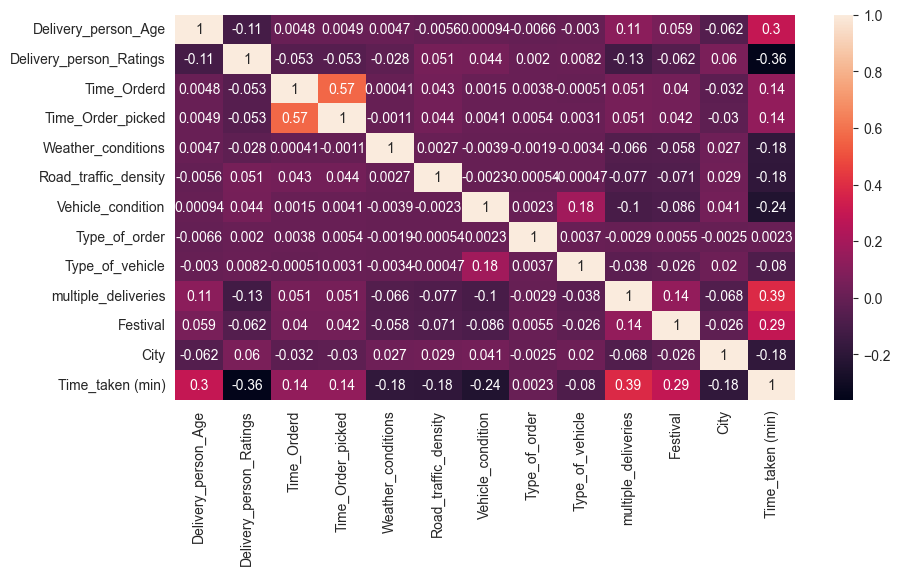

In [21]:
#CORELATION HEATMAP

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),fmt='.2g',annot=True)